# Step 1. Parameter Setting 

In [1]:
import dtnmonitor_v2 as dtn
import subprocess,datetime,sys

def exec_print(command):
  with open(logfile, 'a') as f:
      process = subprocess.Popen([command], stdout=subprocess.PIPE,stderr=subprocess.STDOUT, shell=True)
      f.write("\n# command: " + command + "(time:" + datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S") + ")\n")
      for line in iter(process.stdout.readline, b''):
          # system print
          sys.stdout.write(line)
          # log
          f.write(line.decode(sys.stdout.encoding) )


logfile='/tmp/test2.log' # log file

graph_mode=1  #0 all, 1 100pt



# Step 2. DTN System Checking Instruction Guild

## 2.1. To change TCP parameters, edit /etc/sysctl.conf as:

In [2]:
# net.core.default_qdisc = fq
# net.core.netdev_max_backlog=250000
# net.ipv4.tcp_no_metrics_save=1
# net.ipv4.tcp_congestion_control=htcp
# net.ipv4.tcp_mtu_probing=1
# net.core.rmem_max=671088640
# net.core.wmem_max=671088640
# net.core.rmem_default=335544320
# net.core.wmem_default=335544320
# net.core.optmem_max=335544320
# net.ipv4.tcp_mem=33554432 335544320 2355443200
# net.ipv4.tcp_rmem = 409600 100873800 2147483647
# net.ipv4.tcp_wmem = 409600 100873800 2147483647

In [3]:
# check it
# show your system config
#dtn.exec_sysout("sysctl -a |grep 'net.core\|net.ipv4.tcp'")
#dtn.exec_print("sysctl -a |grep 'net.core\|net.ipv4.tcp'")
exec_print("sysctl -a |grep 'net.core\|net.ipv4.tcp'")

sysctl: permission denied on key 'fs.protected_hardlinks'
sysctl: permission denied on key 'fs.protected_symlinks'
sysctl: permission denied on key 'kernel.cad_pid'
sysctl: permission denied on key 'kernel.unprivileged_userns_apparmor_policy'
sysctl: permission denied on key 'kernel.usermodehelper.bset'
sysctl: permission denied on key 'kernel.usermodehelper.inheritable'
sysctl: permission denied on key 'net.ipv4.tcp_fastopen_key'
sysctl: permission denied on key 'net.ipv6.conf.all.stable_secret'
sysctl: permission denied on key 'net.ipv6.conf.default.stable_secret'
sysctl: permission denied on key 'net.ipv6.conf.enp0s3.stable_secret'
sysctl: permission denied on key 'net.ipv6.conf.enp0s8.stable_secret'
sysctl: permission denied on key 'net.ipv6.conf.lo.stable_secret'
net.core.bpf_jit_enable = 0
net.core.busy_poll = 0
net.core.busy_read = 0
net.core.default_qdisc = pfifo_fast
net.core.dev_weight = 64
net.core.flow_limit_cpu_bitmap = 0
net.core.flow_limit_table_len = 4096
net.core.max_s

## 2.2 update Mellanox driver to the most recent one (4.1) and tuning script package.


In [4]:
### Run the tuning script in priority: 
# sudo mlnx_tune


In [7]:
# check it
#exec_print('if [ $(ls /tmp/mlnx_tune_*.log) ];then echo "ok, good";else echo "No, you did not do it"; fi;')
exec_print("sudo /usr/sbin/mlnx_tune")

sudo: /usr/sbin/mlnx_tune: command not found


## 2.3 Bind NIC interrupt with the correct numa cores using:


In [8]:
### /user/sbin/set_irq_affinity_bynode.sh <numa_node> <interface>


In [9]:
# no check command

## 2.4 Check PCIe Width, Speed, Max Payload Size and Max Read Request

In [12]:
#lspci: https://community.mellanox.com/docs/DOC-2496
# /usr/bin/setpci -s 41:00.0 68.W=5000
### Especially set Max Read Request to 4096

In [13]:

exec_print('if [ $(lspci -s 04:00.0 -vvv | grep MaxReadReq) ];then echo "ok, good";else echo "No, you did not do it"; fi;')


No, you did not do it


## 2.5. Increase txqueuelen to 10000:


In [14]:
### ifconfig <interface> txqueuelen 10000

In [15]:
exec_print('ifconfig |grep txqueuelen')

          collisions:0 txqueuelen:1000 
          collisions:0 txqueuelen:1000 
          collisions:0 txqueuelen:1 


## 2.6 Set CPU gonvener setting to performance:

In [16]:
### cpupower frequency-set -g performance

In [17]:
exec_print('cpupower frequency-info -g')

/bin/sh: 1: cpupower: not found


## 2.7. Turn off irqbalance and tuned:

In [18]:
### service  irqbalance stop
### service  tuned stop

In [19]:
exec_print('service irqbalance status ')

● irqbalance.service - LSB: daemon to balance interrupts for SMP systems
   Loaded: loaded (/etc/init.d/irqbalance; bad; vendor preset: enabled)
   Active: active (exited) since Thu 2017-10-05 17:35:17 PDT; 12min ago
     Docs: man:systemd-sysv-generator(8)
    Tasks: 0
   Memory: 0B
      CPU: 0

Oct 05 17:35:17 dtnvm systemd[1]: Starting LSB: daemon to balance interrupts for SMP systems...
Oct 05 17:35:17 dtnvm irqbalance[1154]:  * Starting SMP IRQ Balancer: irqbalance
Oct 05 17:35:17 dtnvm /usr/sbin/irqbalance[1184]: Balancing is ineffective on systems with a single cpu.  Shutting down
Oct 05 17:35:17 dtnvm irqbalance[1154]:    ...done.
Oct 05 17:35:17 dtnvm systemd[1]: Started LSB: daemon to balance interrupts for SMP systems.


In [20]:
exec_print('service tuned status ')

● tuned.service
   Loaded: not-found (Reason: No such file or directory)
   Active: inactive (dead)


# Step 3. Start monitor

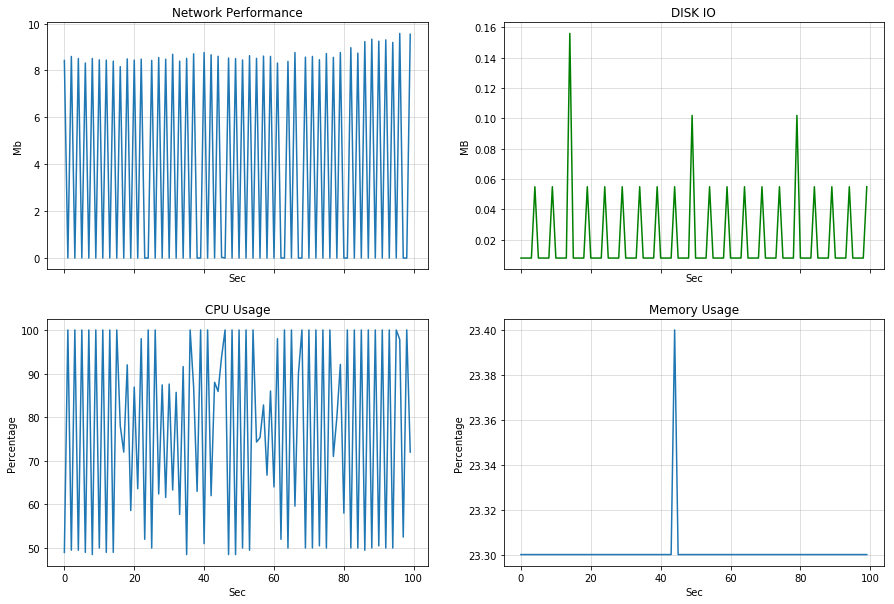

None

In [ ]:
## download and monitor
dtn.exec_command("python callmonitor_v2.py",graph_mode)

## you can stop monitoring anytime when you press "interrupt kernel"